In [1]:
import numpy as np
from scipy.integrate import odeint
from pylab import *


def Spring(s):
    return -(s + s**2 + s**3)

def derivs(var,t):
    N = len(var)//2
    
    x = var[:N]
    v = var[N:]
    
    d = np.zeros(2*N)
    d[:N] = v
    
    for i in range(N):
        
        d[i+N] =  Spring(x[i] - (x[(i+1)%N])) - Spring(x[i-1] - x[i])
    
    return d

In [2]:
def RK4(f,init,t):

    N = len(t)
    Nvar = len(init)
    
    h = t[1]-t[0]

    r = np.zeros([N,Nvar])
    r[0,:] = init

    for i in range(N-1):
        k1 = h*f(r[i,:],t[i])
        k2 = h*f(r[i,:]+k1/2,t[i]+h/2)
        k3 = h*f(r[i,:]+k2/2,t[i]+h/2)
        k4 = h*f(r[i,:]+k3,t[i]+h)
        r[i+1,:] = r[i,:] + (k1+2*k2+2*k3+k4)/6.0

    return r

In [3]:
t = np.linspace(0,200,10000)
N = 30
init = np.zeros(2*N)

for i in range(N):
    init[i+N] = np.sin(2*pi*(i+0.6)/N)
    
Coupled = RK4(derivs, init, t)

#Plot of this is in the lab, removed it from here

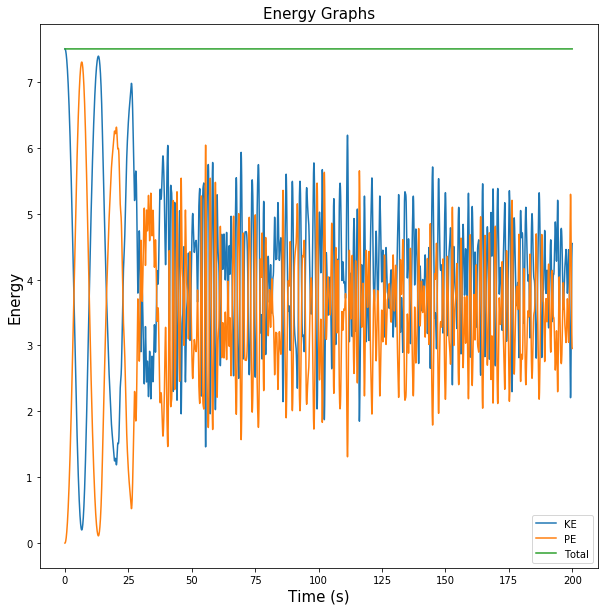

In [4]:
PE = np.zeros(len(t))
for i in range(len(t)):
    for j in range(30):
        PE[i] += ((1/2) * (Coupled[i][j] - Coupled[i][(j+1)%N])**2 + (1/3) * (Coupled[i][j] 
        - Coupled[i][(j+1)%N])**3 + (1/4) * (Coupled[i][j] - Coupled[i][(j+1)%N])**4)

        
KE = np.zeros(len(t))
for i in range(len(t)):
    KE[i] =  0.5 * sum((Coupled[i][30:60]**2))



#I tried using Vel = Coupled[:, 30:60] and that worked but when I used Displacement = Coupled[:, :30] it would not work
#Also whenever I try rerunning this cell my graph messes up and I need to restart the kernel to correct it  
#Problem seems to have something to do with PE
    
fig1 = plt.figure(figsize=(10,10));
plt.title('Energy Graphs', fontsize=15)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Energy', fontsize = 15)
plt.plot(t, KE, label = 'KE')
plt.plot(t, PE, label = 'PE')
plt.plot(t, KE + PE, label = 'Total')
legend()

In [5]:
m1 = 1
m2 = 2
d = 1.5


t0 = 0
tf = 3
N = 1000
h = (tf-t0)/N
T = np.linspace(t0, tf, N+1)
r = np.zeros((N+1, 4))

r[0,0] = 0 ; r[0,1] = d ; r[0,2] = 0; r[0,3] = 0  

for i in range(1, N+1):    
    r[i,0] = r[i-1,0] + h*r[i-1,2]    
    r[i,1] = r[i-1,1] + h*r[i-1,3] 
    r[i,2] = r[i-1,2] + h*-1/(m1*(r[i-1,0] - r[i-1,1])**2)
    r[i,3] = r[i-1,3] + h*1/(m2*(r[i-1,0] - r[i-1,1])**2)


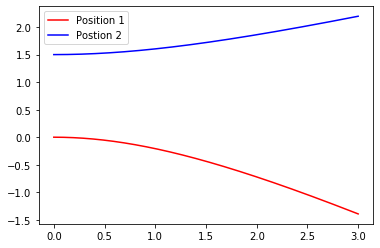

In [6]:
plt.plot(T,r[:,0], color = 'red', label = 'Position 1')
plt.plot(T,r[:,1], color = 'blue',label = 'Postion 2')
legend()

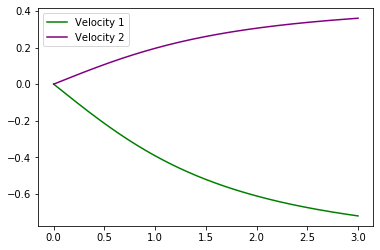

In [7]:
plt.plot(T,r[:,2], color = 'green', label = 'Velocity 1')
plt.plot(T,r[:,3], color = 'purple', label = 'Velocity 2')
legend()

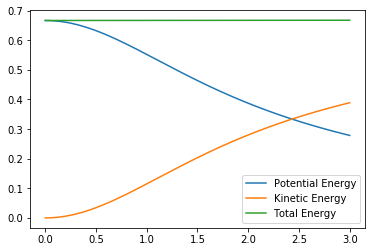

In [8]:
x1 = r[:, 0]
x2 = r[:, 1]
v1 = r[:, 2]
v2 = r[:, 3]
Pot = np.zeros(len(T))
Kin = np.zeros(len(T))


for i in range(len(T)):
    Pot[i] = 1/abs((x1[i] - x2[i])) 
    Kin[i] = 0.5*(m1*v1[i]**2 + m2*v2[i]**2)

plt.plot(T, Pot, label = 'Potential Energy')
plt.plot(T, Kin, label = 'Kinetic Energy')
plt.plot(T, Pot + Kin, label = 'Total Energy')
legend()